**1. How does the tf-idf weight distribution (computed for Question 2 on Week 2) differ between non-stemmed and stemmed versions of one same set of documents? Is there a visually identifiable difference (in their histograms)? Can a statistical test tell them apart?**

In [1]:
install.packages("janeaustenr") # a new package to access a particular author's works in the Gutenberg repository
install.packages("tidytext") # in colab, we need to reinstall for each new runtime (on your own machine, install only once)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘hunspell’, ‘tokenizers’




In [2]:
library(dplyr)
library(janeaustenr) 
library(tidytext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  count(book, word, sort = TRUE) %>%
  ungroup()

total_words <- book_words %>%
  group_by(book) %>%
  summarize(total = sum(n))

book_words <- left_join(book_words, total_words)

head(book_words)

Joining, by = "word"
Joining, by = "book"


book,word,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,fanny,816,47968
Emma,emma,786,46775
Sense & Sensibility,elinor,623,36330
Emma,miss,599,46775
Pride & Prejudice,elizabeth,597,37246
Mansfield Park,crawford,493,47968


In [4]:
book_words <- book_words %>%
  bind_tf_idf(word, book, n)
head(book_words)

book,word,n,total,tf,idf,tf_idf
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Mansfield Park,fanny,816,47968,0.01701134,0.6931472,0.01179136
Emma,emma,786,46775,0.01680385,1.0986123,0.01846091
Sense & Sensibility,elinor,623,36330,0.01714836,1.7917595,0.03072574
Emma,miss,599,46775,0.01280599,0.0000000,0.00000000
Pride & Prejudice,elizabeth,597,37246,0.01602857,0.6931472,0.01111016
Mansfield Park,crawford,493,47968,0.01027769,1.7917595,0.01841514


In [ ]:
#book_words %>% select(-total) %>% arrange(desc(tf_idf))

In [5]:
install.packages("quanteda") # need another library for this
library(quanteda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISOcodes’, ‘fastmatch’, ‘RcppParallel’, ‘stopwords’, ‘RcppArmadillo’


Package version: 3.2.3
Unicode version: 10.0
ICU version: 60.2

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.



In [6]:
book_words %>% 
  count(book, word) %>%
  cast_dfm(book, word, n)

Document-feature matrix of: 6 documents, 13,914 features (55.41% sparse) and 0 docvars.
                     features
docs                  1 10 11 12 13 14 15 16 17 18
  Sense & Sensibility 1  1  1  1  1  1  1  1  1  1
  Pride & Prejudice   1  1  1  1  1  1  1  1  1  1
  Mansfield Park      0  1  0  0  0  0  0  0  0  0
  Emma                0  0  0  0  0  0  0  0  0  0
  Northanger Abbey    1  1  1  1  1  1  1  1  1  1
  Persuasion          1  1  1  1  1  1  1  1  1  1
[ reached max_nfeat ... 13,904 more features ]

In [7]:
library(ggplot2)
library(repr)

Selecting by tf_idf


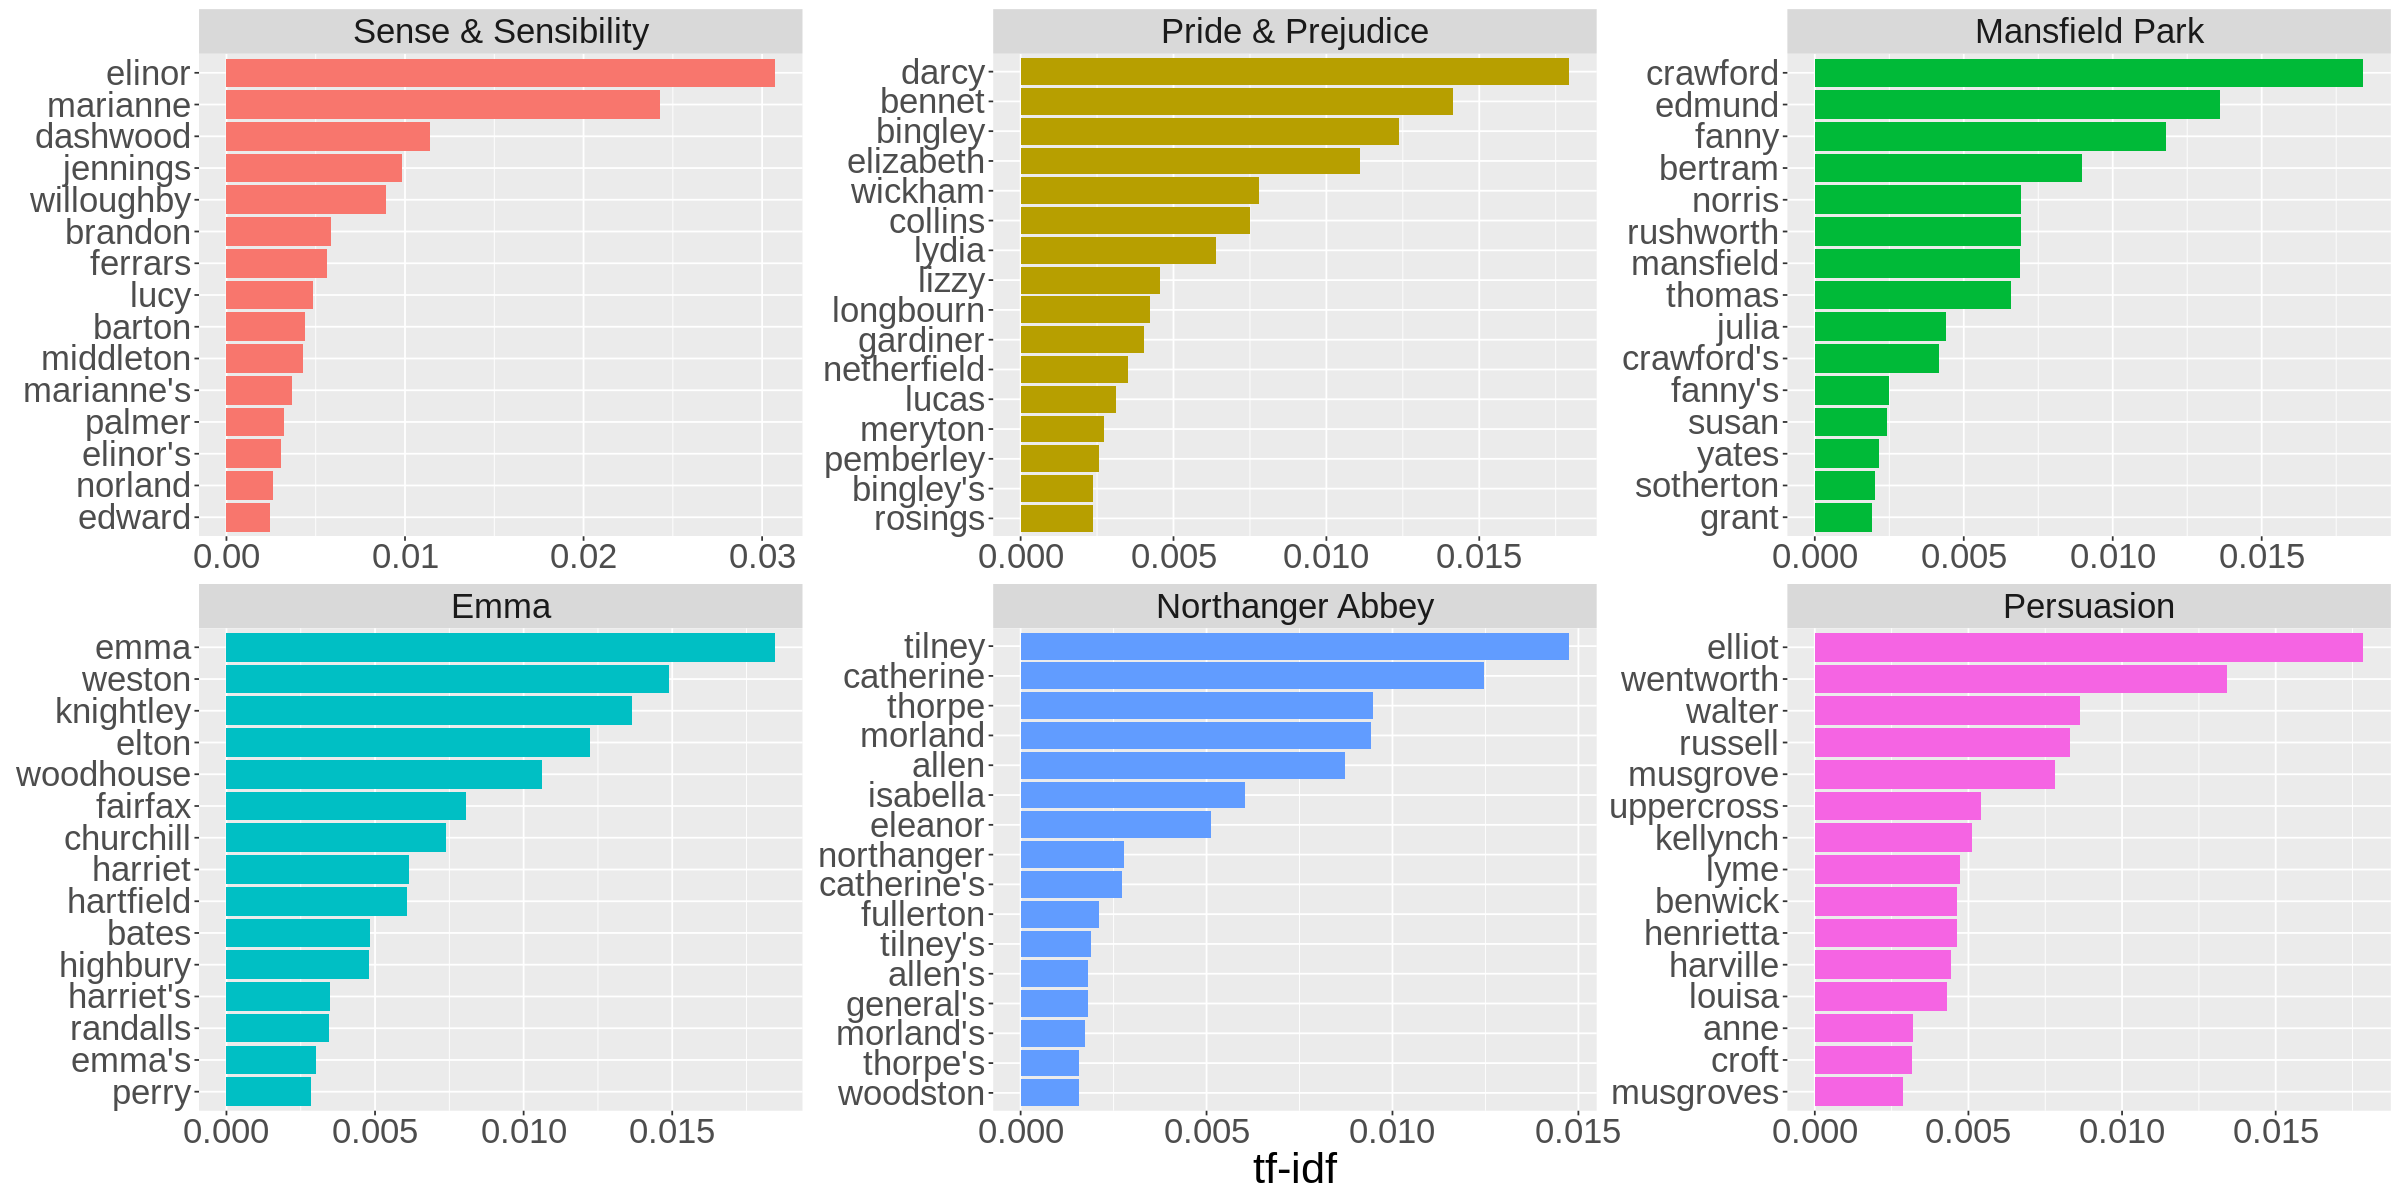

In [8]:
options(repr.plot.width = 20, repr.plot.height = 10) # a wider, shorter figure
book_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(book) %>%
  top_n(15) %>%
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 3, scales = "free") +
  coord_flip()+ 
  theme(text = element_text(size = 26))

In [9]:
library(SnowballC)
# library(stopwords)


In [13]:
book_words_stem <- austen_books() %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  mutate(stem = wordStem(word)) %>%
  count(book, stem, sort = TRUE) %>%
  ungroup()

total_words <- book_words_stem %>%
  group_by(book) %>%
  summarize(total = sum(n))

book_words_stem <- left_join(book_words_stem, total_words)

head(book_words_stem)

Joining, by = "word"
Joining, by = "book"


book,stem,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,fanni,816,47968
Emma,emma,786,46775
Sense & Sensibility,elinor,623,36330
Emma,miss,611,46775
Pride & Prejudice,elizabeth,597,37246
Mansfield Park,crawford,508,47968


In [14]:
book_words_stem <- book_words_stem %>%
  bind_tf_idf(stem, book, n)
head(book_words_stem)

book,stem,n,total,tf,idf,tf_idf
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Mansfield Park,fanni,816,47968,0.01701134,0.6931472,0.01179136
Emma,emma,786,46775,0.01680385,1.0986123,0.01846091
Sense & Sensibility,elinor,623,36330,0.01714836,1.7917595,0.03072574
Emma,miss,611,46775,0.01306253,0.0000000,0.00000000
Pride & Prejudice,elizabeth,597,37246,0.01602857,0.6931472,0.01111016
Mansfield Park,crawford,508,47968,0.01059039,1.7917595,0.01897544


In [15]:
book_words_stem %>% 
  count(book, stem) %>%
  cast_dfm(book, stem, n)

Document-feature matrix of: 6 documents, 8,480 features (51.71% sparse) and 0 docvars.
                     features
docs                  1 10 11 12 13 14 15 16 17 18
  Sense & Sensibility 1  1  1  1  1  1  1  1  1  1
  Pride & Prejudice   1  1  1  1  1  1  1  1  1  1
  Mansfield Park      0  1  0  0  0  0  0  0  0  0
  Emma                0  0  0  0  0  0  0  0  0  0
  Northanger Abbey    1  1  1  1  1  1  1  1  1  1
  Persuasion          1  1  1  1  1  1  1  1  1  1
[ reached max_nfeat ... 8,470 more features ]

Selecting by tf_idf


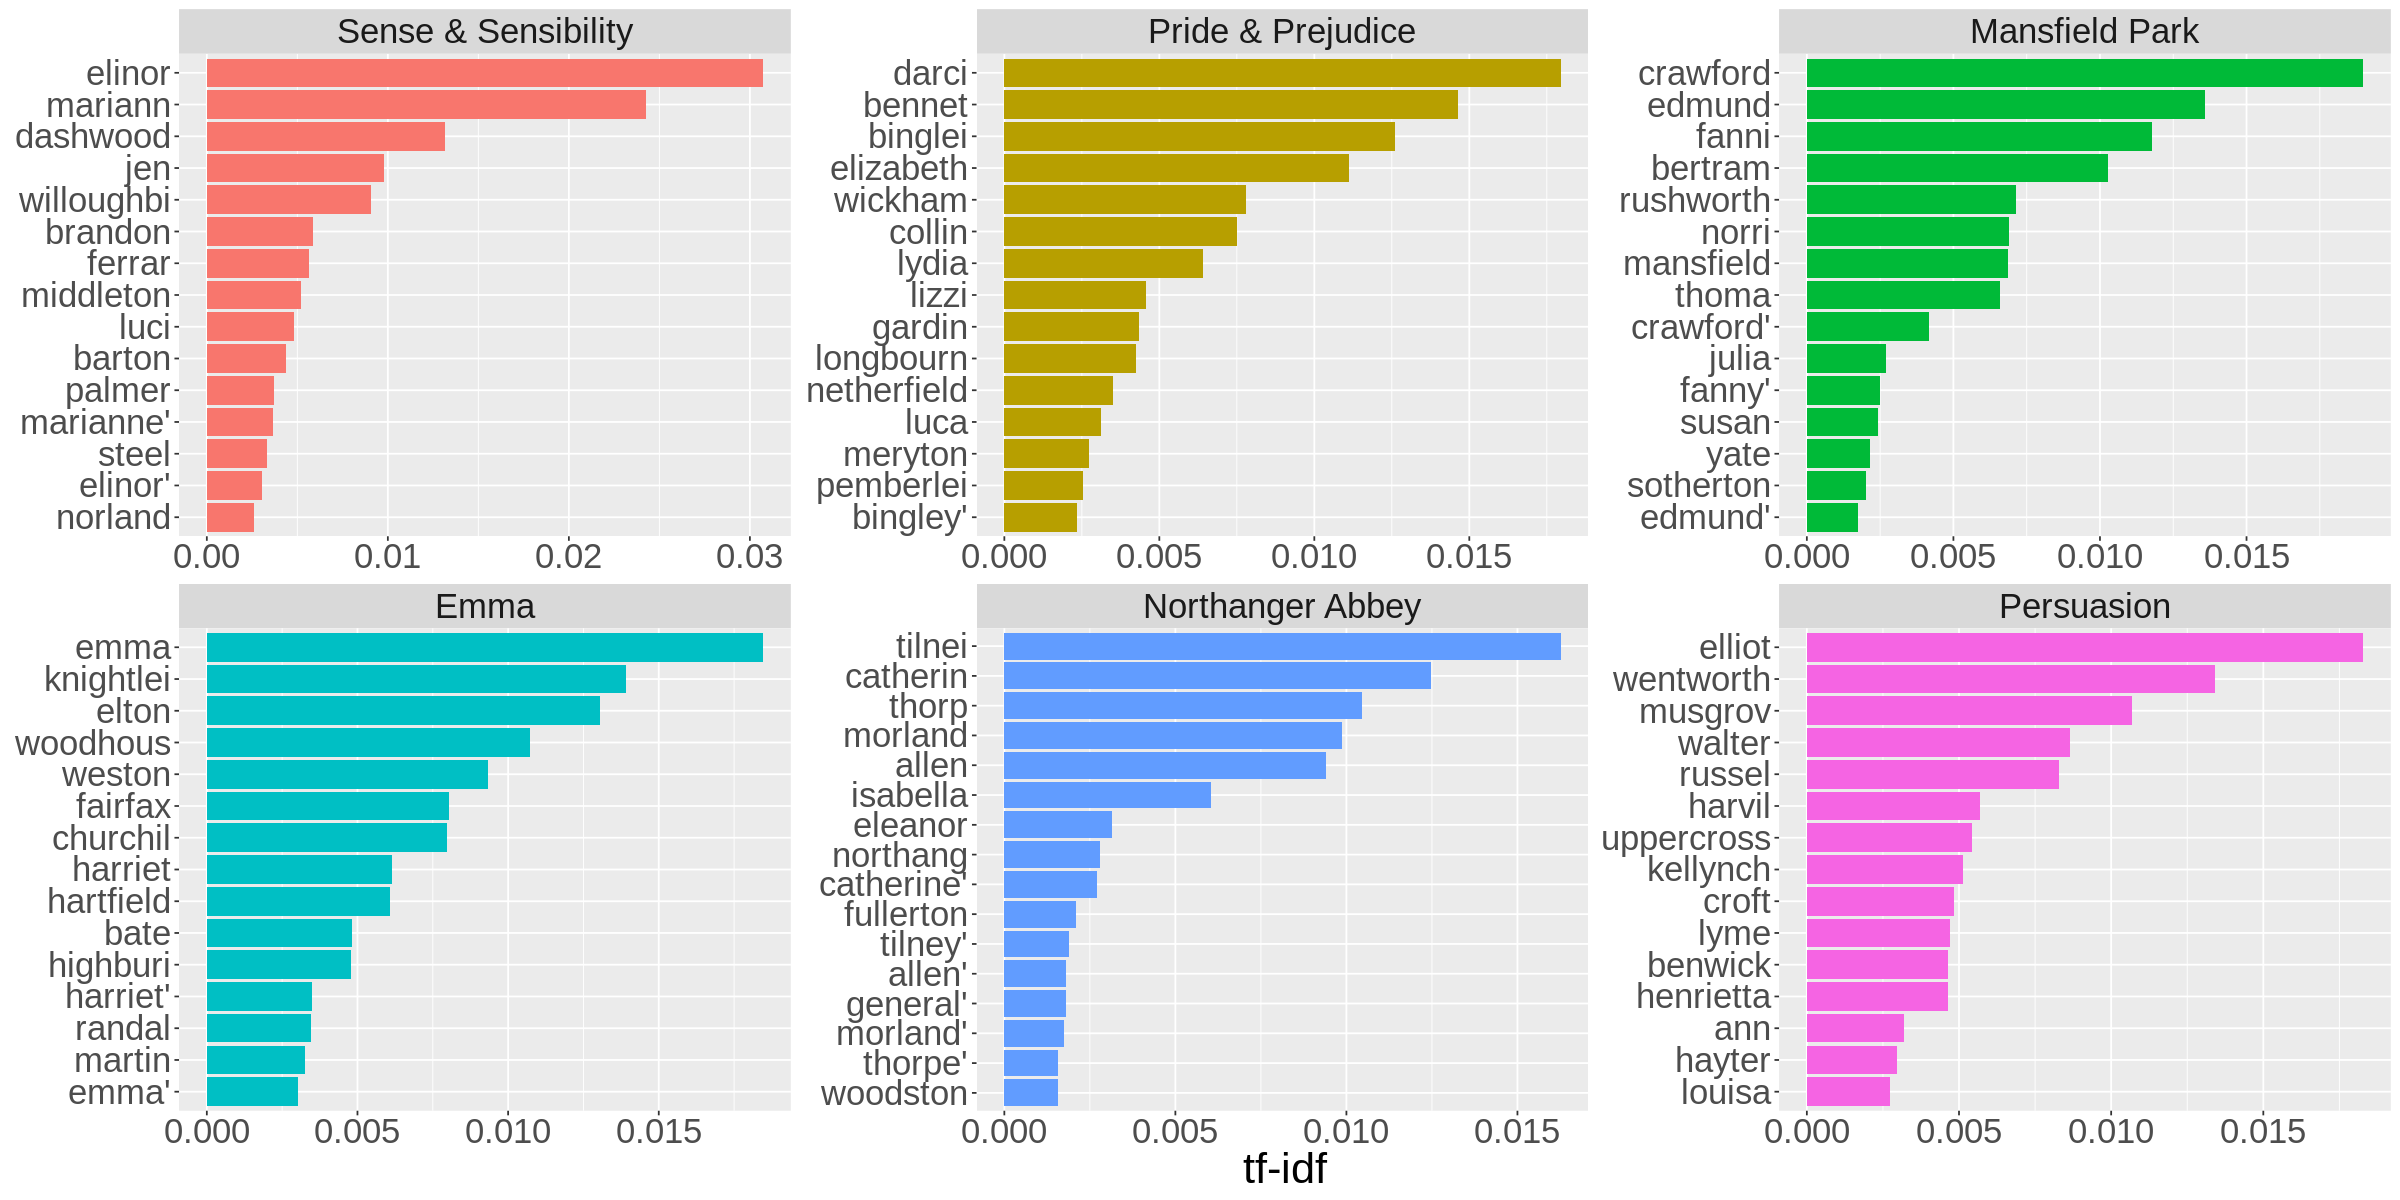

In [16]:
options(repr.plot.width = 20, repr.plot.height = 10) # a wider, shorter figure
book_words_stem %>%
  arrange(desc(tf_idf)) %>%
  mutate(stem = factor(stem, levels = rev(unique(stem)))) %>%
  group_by(book) %>%
  top_n(15) %>%
  ungroup %>%
  ggplot(aes(stem, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 3, scales = "free") +
  coord_flip()+ 
  theme(text = element_text(size = 26))

https://people.reed.edu/~jones/141/qq2.html

In [17]:
Persuasion <- book_words[book_words$book == "Persuasion",]
Persuasion <- Persuasion[,7, drop=FALSE]

Persuasion_s <- book_words_stem[book_words_stem$book == "Persuasion",]
Persuasion_s <- Persuasion_s[,7, drop=FALSE]

In [19]:
x <- book_words$tf_idf
y <- Persuasion_s$tf_idf

slope <- sqrt(var(y)/var(x))
int <- var(y) - slope * var(x)
#int <- y[1] - slope * x[1] 
slope
int

[1] 1.223163

[1] 5.302995e-08

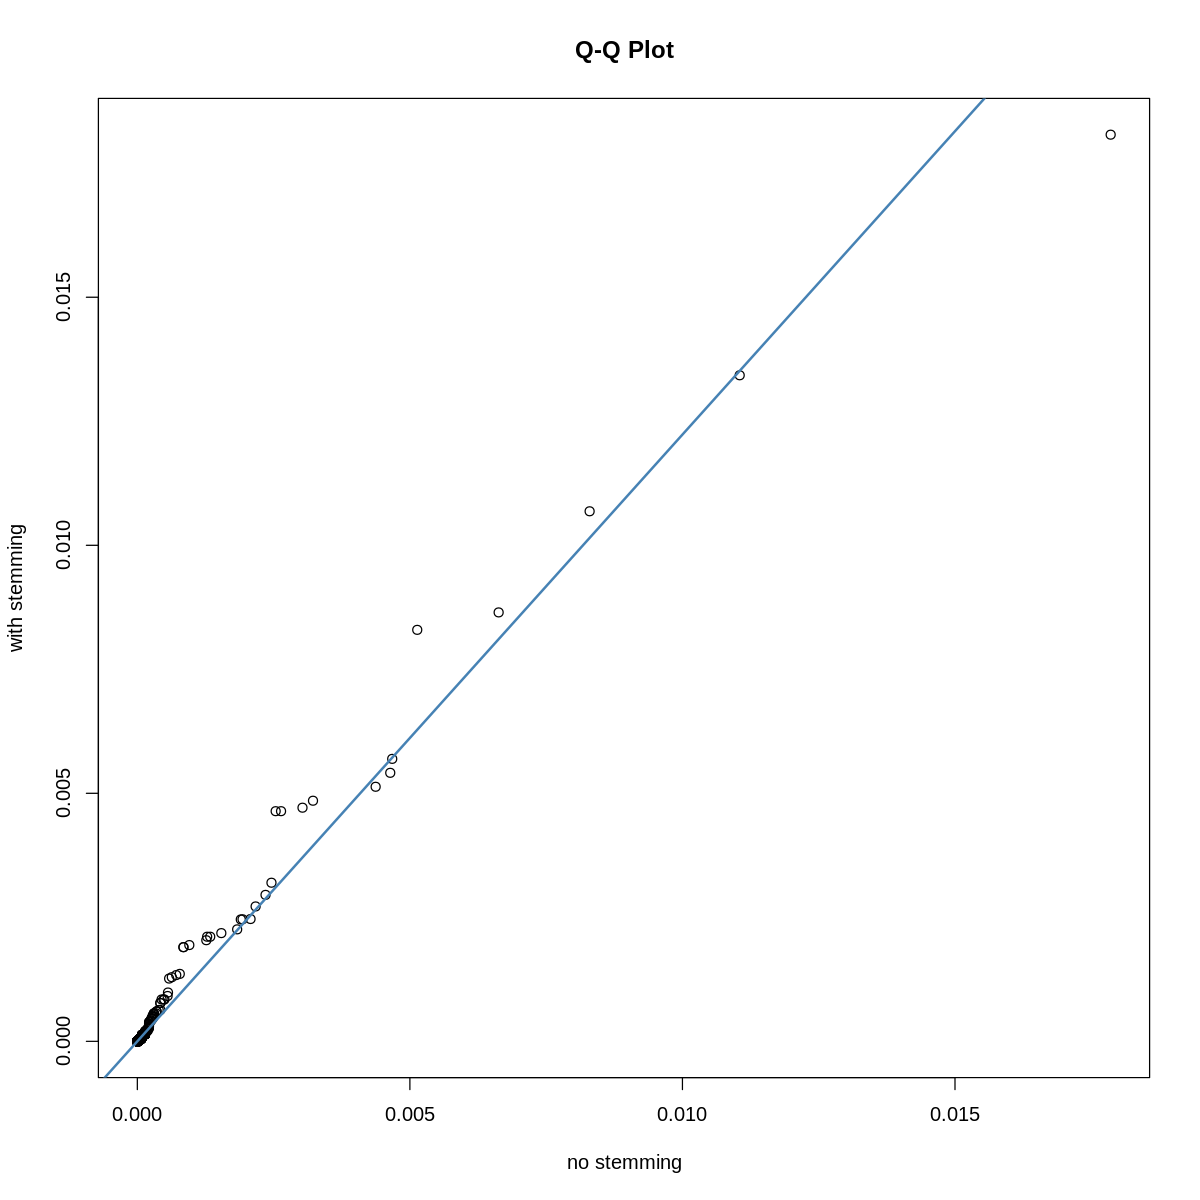

In [20]:
# qqplot function in r package
x <- Persuasion$tf_idf
y <- Persuasion_s$tf_idf

options(repr.plot.width = 10, repr.plot.height = 10) # a wider, shorter figure
qqplot(x, y, xlab = "no stemming", ylab = "with stemming", main = "Q-Q Plot")#, ylim = c(0, 0.03), xlim = c(0, 0.32))
abline(c(int, slope), col = "steelblue", lwd = 2)

Si je prends le livre persuasion comme exemple, nous pouvons remarquer que le mot musgrove est en 5e position et musgroves en 15e position avec l’histogramme sans stemming. Avec le stemming, il passe en 3e position et le mot est unique (singulier vs. Pluriel). Les 2 distributions semblent similaires avec une légère concavité vers le bas (qqplot). On peut voir ci-dessous que le stemming réduit le nombre de features.

Sans stemming: 13,914 features (55.41% sparse)

Avec stemming: 8,480 features (51.71% sparse)


**2. What is the effect of the presence/absence of stemming in the proposed term/document similarity measures (Questions 2 & 3 of Week 2)? You can try it out and/or speculate about it on a conceptual level.**

In [21]:
d1 <- book_words[book_words$book == "Mansfield Park",]
d2 <- book_words[book_words$book == "Sense & Sensibility",]
d3 <- book_words[book_words$book == "Emma",]
d4 <- book_words[book_words$book == "Pride & Prejudice",]
d5 <- book_words[book_words$book == "Persuasion",]
d6 <- book_words[book_words$book == "Northanger Abbey",]

In [22]:
v1 <- d1$tf_idf  
v2 <- d2$tf_idf
v3 <- d3$tf_idf
v4 <- d4$tf_idf
v5 <- d5$tf_idf
v6 <- d6$tf_idf

In [23]:
m1 <- cbind(v1,v2,v3,v4,v5,v6)

Warning message in cbind(v1, v2, v3, v4, v5, v6):
“number of rows of result is not a multiple of vector length (arg 2)”


In [24]:
install.packages("lsa")
library(lsa)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
cosine(m1)

,v1,v2,v3,v4,v5,v6
v1,1.0000000,0.4635181,0.3277274,0.3471261,0.2718605,0.3115115
v2,0.4635181,1.0000000,0.2779110,0.3055375,0.1106036,0.1725611
v3,0.3277274,0.2779110,1.0000000,0.2016212,0.2234809,0.2706597
v4,0.3471261,0.3055375,0.2016212,1.0000000,0.2619614,0.2649296
v5,0.2718605,0.1106036,0.2234809,0.2619614,1.0000000,0.2584988
v6,0.3115115,0.1725611,0.2706597,0.2649296,0.2584988,1.0000000


In [26]:
e1 <- book_words_stem[book_words_stem$book == "Mansfield Park",]
e2 <- book_words_stem[book_words_stem$book == "Sense & Sensibility",]
e3 <- book_words_stem[book_words_stem$book == "Emma",]
e4 <- book_words_stem[book_words_stem$book == "Pride & Prejudice",]
e5 <- book_words_stem[book_words_stem$book == "Persuasion",]
e6 <- book_words_stem[book_words_stem$book == "Northanger Abbey",]

In [27]:
w1 <- e1$tf_idf  
w2 <- e2$tf_idf
w3 <- e3$tf_idf
w4 <- e4$tf_idf
w5 <- e5$tf_idf
w6 <- e6$tf_idf

In [28]:
m2 <- cbind(w1,w2,w3,w4,w5,w6)

Warning message in cbind(w1, w2, w3, w4, w5, w6):
“number of rows of result is not a multiple of vector length (arg 2)”


In [29]:
cosine(m2)

,w1,w2,w3,w4,w5,w6
w1,1.0000000,0.45558330,0.3548216,0.3439008,0.27460624,0.5813645
w2,0.4555833,1.00000000,0.2726016,0.2903178,0.09925003,0.3386259
w3,0.3548216,0.27260158,1.0000000,0.1991934,0.21180681,0.2380987
w4,0.3439008,0.29031780,0.1991934,1.0000000,0.17794779,0.2340047
w5,0.2746062,0.09925003,0.2118068,0.1779478,1.00000000,0.1920985
w6,0.5813645,0.33862586,0.2380987,0.2340047,0.19209846,1.0000000


Par document, nous pouvons voir que la similarité augmente généralement avec le stemming. 

Sans stemming: doc 1 vs doc 6 = 0.3115

Avec stemming: doc 1 vs doc 6 = 0.5814


**3. What happens to the proportion of words found in the sentiment lexicons (used on Week 3) when stemming or lemmatization is carried out versus when it is not? Do you expect this to affect NLP systems that seek to identify or quantify feelings?**

In [ ]:
install.packages("tm") # only install ONCE on your own computer
install.packages("textdata") # this is new for Session 3, install now if using your own computer

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidytext)
library(textdata)
library(dplyr) # needed for piping with %>%
interactive() # this is NOT an interactive R GUI so we cannot answer "Do you want to download" dialogues
tns <- getNamespace("textdata") # so, unless we run this on a local machine, we need to do more steps
assignInNamespace(x = "printer", value = function(...) 1, ns = tns) # a workaround from https://community.rstudio.com/t/is-there-a-way-to-make-the-choices-asked-for-in-the-package-always-yes/105442


[1] FALSE

In [ ]:
# The AFINN lexicon assigns words with a score that runs between -5 and 5, 
# with negative scores indicating negative sentiment and positive scores indicating positive sentiment.

afinn <- get_sentiments("afinn")
colnames(afinn)[2] = "AFINN"

In [ ]:
# The NRC lexicon categorizes words in a binary fashion (“yes”/“no”) into categories of sentiement: positive, negative, 
# and emotion: anger, anticipation, disgust, fear, joy, sadness, surprise, and trust. 
nrc <- get_sentiments("nrc")
colnames(nrc)[2] = "NRC"

In [ ]:
# The Bing lexicon categorizes words in a binary fashion into positive and negative categories.
bing <- get_sentiments("bing")
colnames(bing)[2] = "Bing"

In [ ]:
library(tidyverse)
library(rvest)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [ ]:
# we base this on a vignette from https://martinctc.github.io/blog/vignette-scraping-amazon-reviews-in-r/ 
webscrape <- function(ASIN){
  url <- paste0("https://www.amazon.ca/product-reviews/", ASIN, "/?pageNumber=1") # just the first page
  doc <- read_html(url)
  doc %>% 
    html_nodes("[class='a-size-base review-text review-text-content']") %>% html_text() -> content
  doc %>%
    html_nodes("[data-hook='review-star-rating']") %>% html_text() -> review_star
  return(tibble(content, review_star))
}

In [ ]:
#first <- mutate(webscrape("1492054054"), title = "Practical NLP") # https://www.amazon.com/Practical-Natural-Language-Processing-Pragmatic/dp/1492054054/
#second <- mutate(webscrape("1491978236"), title = "NLP with PyTorch") # https://www.amazon.ca/Natural-Language-Processing-PyTorch-Applications/dp/1491978236/
#third <- mutate(webscrape("1617294632"), title = "NLP in Action") # https://www.amazon.ca/Natural-Language-Processing-Action-Understanding/dp/1617294632/

first <- mutate(webscrape("0593534328"), title = "Italian") # https://www.amazon.com/Essentials-Classic-Italian-Cooking-Anniversary/dp/0593534328/
second <- mutate(webscrape("1579658768"), title = "France") # https://www.amazon.com/Lets-Eat-France-specialty-personalities/dp/1579658768/
third <- mutate(webscrape("194464895X"), title = "China") # https://www.amazon.com/China-Study-Cookbook-Expanded-Plant-Based/dp/194464895X/


In [ ]:
# combine the 3 reviews of book 
combo <- rbind(first, second, third)
combo1 <- combo %>% count(title)

In [ ]:
# token by word for each review
reviews <- combo %>% mutate(review = row_number()) 
data <- reviews %>% unnest_tokens(word, content, to_lower = TRUE)

In [ ]:
# clean with the stopword
clean <- data %>% filter(!word %in% stop_words$word)

In [ ]:
# count the total of word for each book
t <- clean %>% group_by(title) %>% count(title) 
colnames(t)[2] = "Total"

In [ ]:
# count the word in the afinn lexicon for each book
c_afinn <- clean %>% inner_join(afinn) %>% group_by(title) %>% count(title) 
colnames(c_afinn)[2] = "n_afinn"

Joining, by = "word"


In [ ]:
# count the word in the nrc lexicon for each book
c_nrc <- clean %>% inner_join(nrc) %>% filter(NRC %in% c('positive', 'negative')) %>% group_by(title) %>% count(title) 
colnames(c_nrc)[2] = "n_nrc"

Joining, by = "word"


In [ ]:
# count the word in the bing lexicon for each book
c_bing <- clean %>% inner_join(bing) %>% group_by(title) %>% count(title) 
colnames(c_bing)[2] = "n_bing"

Joining, by = "word"


In [ ]:
total <- merge(x = c_afinn, y = c_nrc, by = "title", all = TRUE)
total <- merge(x = total, y = c_bing, by = "title", all = TRUE)
total <- merge(x = total, y = t, by = "title", all = TRUE) 

In [ ]:
pa <- total %>% group_by(title) %>% summarize("p_afinn" = n_afinn/Total) %>% ungroup()
pb <- total %>% group_by(title) %>% summarize("p_bing" = n_bing/Total) %>% ungroup()
pn <- total %>% group_by(title) %>% summarize("p_nrc" = n_nrc/Total) %>% ungroup()
tt <- left_join(pb, total)
tt <- left_join(pn, tt)
tt <- left_join(pa, tt)
tt

Joining, by = "title"
Joining, by = "title"
Joining, by = "title"


title,p_afinn,p_nrc,p_bing,n_afinn,n_nrc,n_bing,Total
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
China,0.1265306,0.1714286,0.1469388,31,42,36,245
France,0.1645570,0.2025316,0.1772152,26,32,28,158
Italian,0.1269841,0.2103175,0.1904762,32,53,48,252


In [ ]:
clean <- combo %>%
  unnest_tokens(word, content, to_lower = TRUE) %>%
  anti_join(stop_words) %>%
  mutate(stem = wordStem(word)) %>%
  ungroup()
head(clean,5)

Joining, by = "word"


review_star,title,word,stem
<chr>,<chr>,<chr>,<chr>
5.0 out of 5 stars,Italian,recipes,recip
5.0 out of 5 stars,Italian,explained,explain
5.0 out of 5 stars,Italian,date,date
5.0 out of 5 stars,Italian,excellent,excel
5.0 out of 5 stars,Italian,agree,agre


In [ ]:
clean <- clean[ -c(3) ]
names(clean)[3] <- "word"
head(clean,5)

review_star,title,word
<chr>,<chr>,<chr>
5.0 out of 5 stars,Italian,recip
5.0 out of 5 stars,Italian,explain
5.0 out of 5 stars,Italian,date
5.0 out of 5 stars,Italian,excel
5.0 out of 5 stars,Italian,agre


In [ ]:
# count the total of word for each book
t <- clean %>% group_by(title) %>% count(title) 
colnames(t)[2] = "Total"

In [ ]:
# count the word in the afinn lexicon for each book
c_afinn <- clean %>% inner_join(afinn) %>% group_by(title) %>% count(title) 
colnames(c_afinn)[2] = "n_afinn"

Joining, by = "word"


In [ ]:
# count the word in the nrc lexicon for each book
c_nrc <- clean %>% inner_join(nrc) %>% filter(NRC %in% c('positive', 'negative')) %>% group_by(title) %>% count(title) 
colnames(c_nrc)[2] = "n_nrc"

Joining, by = "word"


In [ ]:
# count the word in the bing lexicon for each book
c_bing <- clean %>% inner_join(bing) %>% group_by(title) %>% count(title) 
colnames(c_bing)[2] = "n_bing"

Joining, by = "word"


In [ ]:
total <- merge(x = c_afinn, y = c_nrc, by = "title", all = TRUE)
total <- merge(x = total, y = c_bing, by = "title", all = TRUE)
total <- merge(x = total, y = t, by = "title", all = TRUE) 

In [ ]:
pa <- total %>% group_by(title) %>% summarize("p_afinn" = n_afinn/Total) %>% ungroup()
pb <- total %>% group_by(title) %>% summarize("p_bing" = n_bing/Total) %>% ungroup()
pn <- total %>% group_by(title) %>% summarize("p_nrc" = n_nrc/Total) %>% ungroup()
tt <- left_join(pb, total)
tt <- left_join(pn, tt)
tt <- left_join(pa, tt)
tt

Joining, by = "title"
Joining, by = "title"
Joining, by = "title"


title,p_afinn,p_nrc,p_bing,n_afinn,n_nrc,n_bing,Total
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
China,0.07755102,0.1306122,0.09795918,19,32,24,245
France,0.13924051,0.1582278,0.13291139,22,25,21,158
Italian,0.07539683,0.1626984,0.11111111,19,41,28,252


Avec le stemming, les sentiments sont beaucoup moin détecté dans un texte. Les lexiques afinn, nrc et bing ne contiennent pas les mots stemming. Il faudrait utiliser un lexique auquel les mots sont stemming.

Sans stemming : Chine = 0.1265

Avec stemming : Chine = 0.0776

Ceci est donc un mauvais exemple puisque plusieurs documentations utilisent le stemming pour l’analyse de sentiment.  Il place les variations de sentiment dans un même mot ce qui réduit efficacement l’entropie et augmente la pertinence du concept du mot.

https://ieeexplore.ieee.org/document/8931812/metrics#metrics

http://www.narimanfarsad.com/cps803/docs/samples/CPS803-SampleReport-SentimentAnalysis.pdf

https://ieeexplore.ieee.org/abstract/document/7785373


**8. Are there languages that are harder or easier to stem than English? What linguistic structures affect this?**

In [ ]:
install.packages("hcandersenr")
library(hcandersenr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
stopword_df <- tribble(~language, ~two_letter,
                       "danish",  "da",
                       "english", "en",
                       "french",  "fr",
                       "german",  "de",
                       "spanish", "es")

tidy_by_lang <- hca_fairytales() %>%
  filter(book == "The fir tree") %>%
  select(text, language) %>%
  mutate(language = str_to_lower(language)) %>%
  unnest_tokens(word, text) %>%
  nest(data = word)

Joining, by = "language"
Joining, by = "word"
Joining, by = "word"
Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


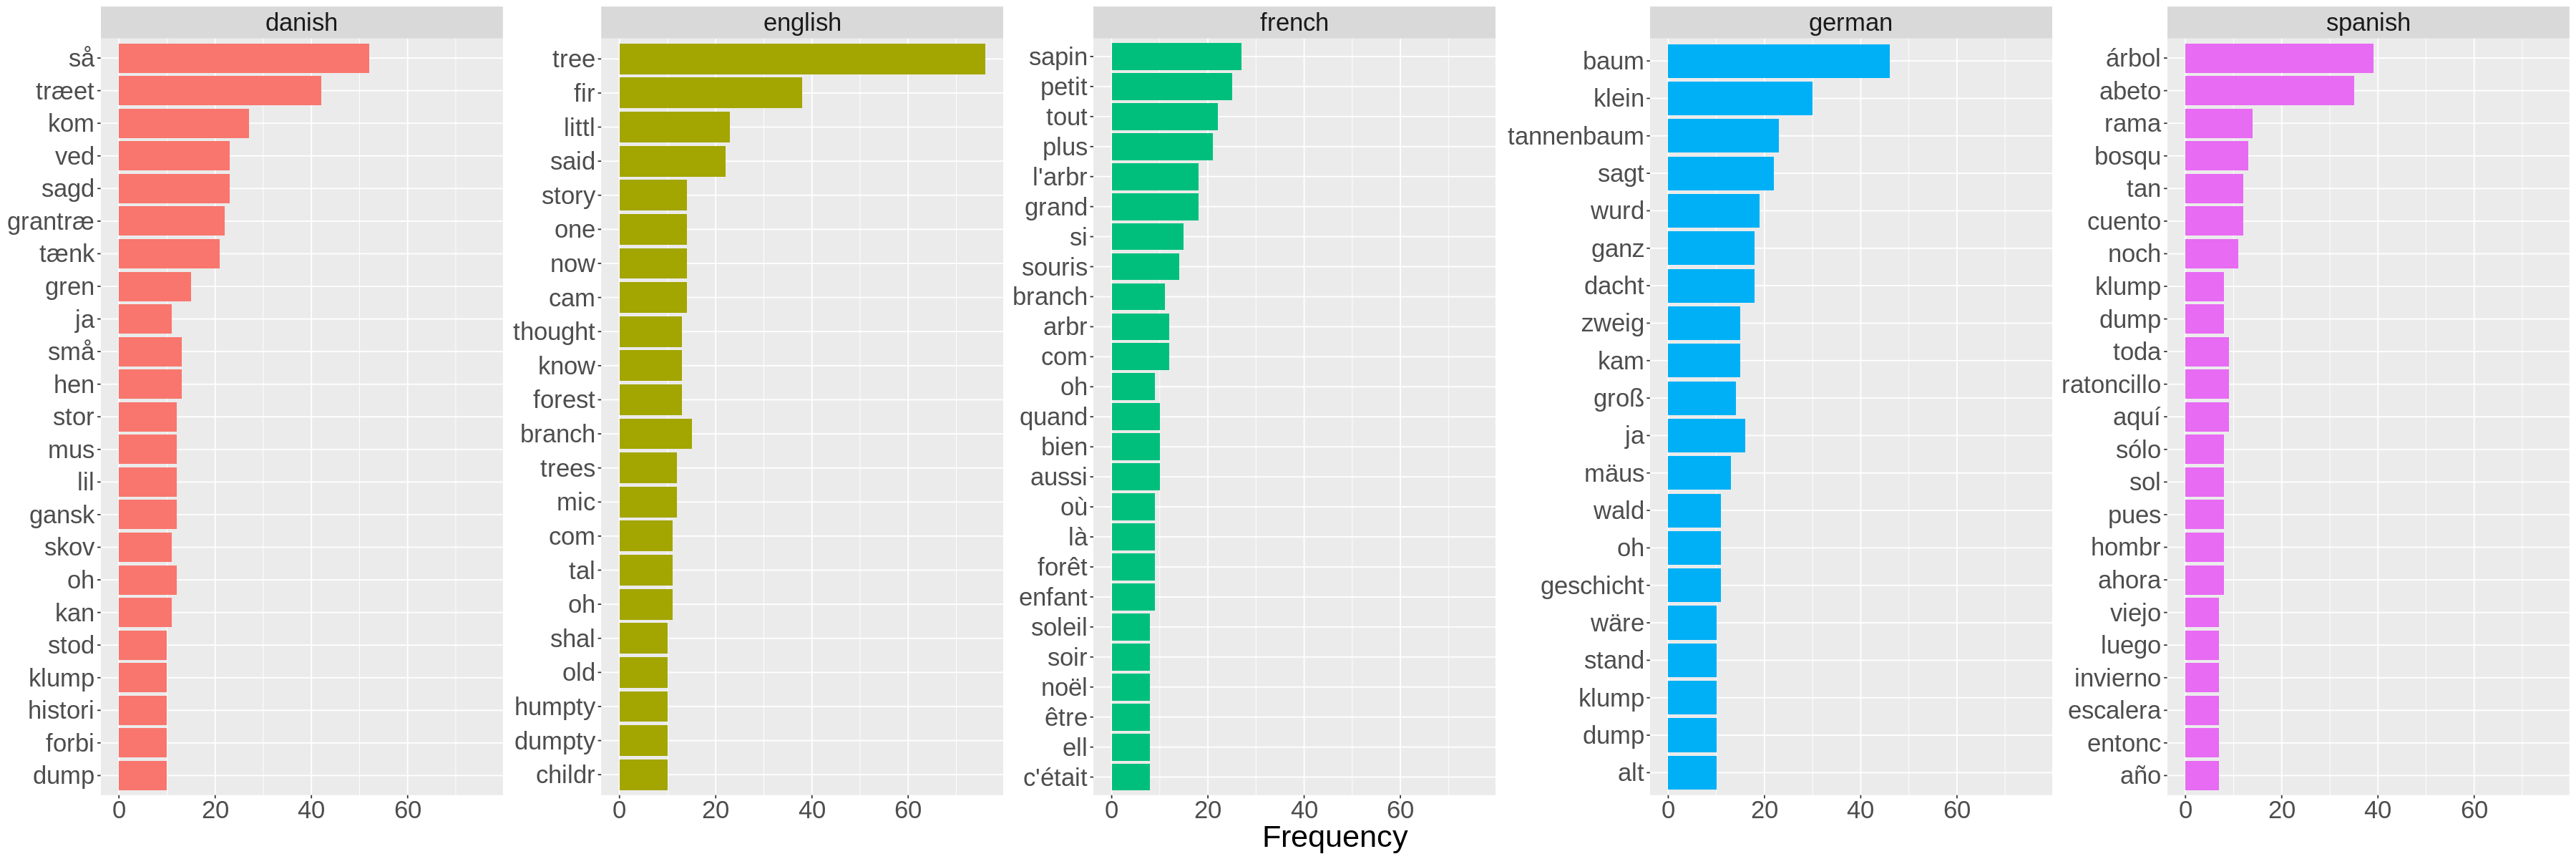

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10) # a wider, shorter figure
tidy_by_lang %>%
  inner_join(stopword_df) %>%
  mutate(data = map2(
    data, two_letter, ~ anti_join(.x, get_stopwords(language = .y)))
  ) %>%
  unnest(data) %>%
  mutate(stem = wordStem(word, language = language)) %>%
  group_by(language) %>%
  count(stem) %>%
  top_n(20, n) %>%
  ungroup() %>%
  ggplot(aes(n, fct_reorder(stem, n), fill = language)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~language, scales = "free_y", ncol = 5) +
  labs(x = "Frequency", y = NULL) +
  theme(text = element_text(size = 26))

J’ai reproduit le même exemple que dans le livre de référence de cette semaine qui illustre certains défis avec des langues autres que l’anglais. La listes des mots vides peuvent ne pas être identique d’une langue à un autre. Les stratégies de tokenization peuvent être différent pour une autre langue (contraction des mots par exemple). Nous pouvons visualiser cet effet.

Hunspell: Algorithm pour traiter le hongrois à l’origine mais entendu pour traiter de nombreuses langues avec des mots composées et une morphologie compliquée. Utilisé comme un correcteur orthographique mais identifie également les racines des mots.

Dans la référence ci-dessous, il est cité que l’anglais est relativement simple comme processus puisque c’est une langue avec peu d’inflexion de mot. Mais pour la plupart des langues, la lemmatisation est plus importante et difficile comme pour le tchèque. Certaines difficultés :

•	Formes irrégulières  les traiter un par un

•	Les mots qui semblent être fléchis mais qu’ils ne le sont pas. 

•	Formes fléchies partagées par différents lemmes

•	Le nombre de règle d’inflexion peut-être trop élevé ou pas la connaissance suffisante de la langue.

https://towardsdatascience.com/state-of-the-art-multilingual-lemmatization-f303e8ff1a8


**9. Are there languages in which even segmentation (splitting a paragraph into sentences and sentences into words) is challenging?**

https://www.researchgate.net/publication/314504179_Text_Segmentation_for_Analysing_Different_Languages

Selon plusieurs documentation, tendance à appliquer la segmentation de texte pour différentes langues.
Segmentation en mot (charactère) : chinois, oudou, arable, vietnamien, akkadien.
Segmentation par phrases : japonais, grecque et malaise.

https://www.smartdatacollective.com/challenges-chinese-natural-language-processing-segmentation/

Le défis de la langue chinoise, coréen: Le texte d’une phrase n’est pas séparé par des espaces comme l’anglais. L’approche naïve : traiter chaque caractère comme un terme individuel mais ne s’applique pas au chinois. La plupart des termes chinois sont utilisées comme bi-gram. Le problème consiste à sélectionner correctement les n-grams à utiliser comme termes.

https://aclanthology.org/Q18-1030.pdf

Présentation d’une séquence de tag à une segmentation de mots pour un large éventail de langues ayant des systèmes d’écriture et des caractéristiques typologiques différentes. Étude de la corrélation entre divers facteurs typologiques et la précision sur la segmentation des mots. Modèle avec une bonne précision pour toutes les langues UD (Universal Dependencies). 
